# <center> Lecture 9 - Graphical Models</center>

The graphical model (GM) is a branch of ML which uses a graph to represent a domain problem. 

Many ML and deep learning (DL) algorithms belongs to the GM. 
- Naive Dayes' algorithm
- Hidden Markov Model
- Restricted Boltzmann Machine
- Neural Networks

**Probabilitic graphical model** combines both probability and graph theory. 
- the probabilitic part reasons under certainty.
- the graphical part models the dependency or correlation. 

In GM, we model a domain problem wth a collection of random variables $(x_1,x_2,\dots,x_n)$ as a joint distribution $P(x_1,\dots,x_n)$ and present by a graph.
- a variable is represented by a node.
- a dependency or correlation is represented by an edge. 

The examples of the joint probability:
- the likelihood of the observations $P(E)$ - the chance of the lab results
- the marginal probablity $P(x_1)$,$P(x_1,x_3),\dots$ - the chance of having Alzheimer when you are 70
- Conditional probability $P(Y|E)$ - the chance of having Alzheimer given your parents has it
- Maximum a Posterior (MAP), argmax $P(X,E)$ - the most likely disease given the lab results

In GM, we choose a graph to represent information and theire relationship in a dense form - marginal probability, conditional probablity, or MAP. 

<img src="gm_example_0.png" width="600"/> 

The Bayesian Network (BN) example above, the conditional probability $P(R=T|W=T)$:
$$P(R=T|W=T)=\frac{P(W=T,R=T)}{P(W=T)}=\frac{\sum_{S\in\{T,F\}}P(W=T,S,R=T)}{\sum_{S,R\in\{T,F\}}P(W=T,S,R)}$$

the joint probability $P(W=T,R=T)=P(W=T,S,R=T)=P(W=T,S=T,R=T)+P(W=T,S=F,R=T)=0.06598$:
$$\begin{equation}\begin{split}
P(W=T,S=T,R=T)&=P(W=T|S=T,R=T)P(S=T|R=T)P(R=T)\\
              &=0.99\times0.01\times0.2=0.00198\end{split}\end{equation}$$
              
$$P(W=T,S=F,R=T)=P(W=T|S=F,R=T)P(S=F|R=T)P(R=T)=0.064$$


In [1]:
P_WtStRt=0.99*0.01*0.2
print(P_WtStRt)

0.0019800000000000004


In [2]:
P_WtSfRt=0.8*0.4*0.2
print(P_WtSfRt)
P_WtRt=P_WtStRt+P_WtSfRt
print(P_WtRt)

0.06400000000000002
0.06598000000000001


the joint probability $P$ also can be factorized as 
$$P(S,R,G)=\prod_{i\in V}P(x_i|x_{Pa(i)})$$
where $x_{Pa(i)}$ is all parents of $x$ and $i\in V$ is for each node.

$\therefore$ the joint probability $P(S,R,G)$ is 
$$P(S,R,G)=P(S|R)P(R)P(W|S,R)$$

<img src="gm_example.png" width="600"/> 

From the Bayesian Network (BN) example above, the joint probability $P(D,I,G,S,L)$ is 
$$P(D,I,G,S,L)=P(D)P(I)P(G|I,D)P(S|I)P(L|G)$$
- D and I are parent of G - $G|\{D,I\}$
- S is independent of D or G - $S\perp \{D,G\}|I$ then $P(S,D)=P(S)P(D)$
- L is independent of D,I,S - $L\perp \{D,I,S\}|G$


# Example with pgmpy

- pgmpy is a library for working with GM. 
- Unfortunately, it does not come with python package and it needs to be installed. 
- Documentation and list of algorithms supported: https://pgmpy.org/
- Basic tutorial on Probabilistic Graphical models using pgmpy: https://github.com/pgmpy/pgmpy_notebook

pgmpy has following non optional dependencies:

python 3.6 or higher
- networkX
- scipy
- numpy
- pytorch

Some of the functionality would also require:
- tqdm
- pandas
- pyparsing
- statsmodels
- joblib

### Drawing a Conditional Probability Directed Graph

In [3]:
#!pip install pgmpy
#!pip3 install -q daft

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import daft
from daft import PGM

In [5]:
def convert_pgm_to_pgmpy(pgm):
    """Takes a Daft PGM object and converts it to a pgmpy BayesianModel"""
    edges = [(edge.node1.name, edge.node2.name) for edge in pgm._edges]
    model = BayesianModel(edges)
    return model

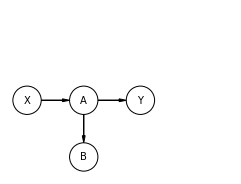

In [6]:
pgm = PGM(shape=[4, 3])

pgm.add_node(daft.Node('X', r"X", 1, 2))
pgm.add_node(daft.Node('Y', r"Y", 3, 2))
pgm.add_node(daft.Node('A', r"A", 2, 2))
pgm.add_node(daft.Node('B', r"B", 2, 1))


pgm.add_edge('X', 'A')
pgm.add_edge('A', 'Y')
pgm.add_edge('A', 'B')

pgm.render()
plt.show()

### Make a GM model

In [7]:
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD

Defining the model structure. We can define the network by just passing a list of edges.

In [8]:
 model = BayesianModel([('D', 'G'), ('I', 'G'), ('G', 'L'), ('I', 'S')]) 

/Users/insukjang/opt/anaconda3/lib/python3.8/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNewtork class, BayesianModel will be removed in future.
  warnings.warn(


Define all the conditional probabilities  tables. 
- these CPD's are formsed by a method in pgmpy called **TabularCPD**.
- The representation of CPD in pgmpy is a bit different than the CPD shown in the above picture. In pgmpy the colums are the evidences and rows are the states of the variable. So the grade CPD is represented like this:


|diff    | intel_0 | intel_0 | intel_1 | intel_1|
| --- | --- | --- | --- | --- |
| intel | diff_0  | diff_1  | diff_0  | diff_1  |
| grade_0 | 0.3     | 0.05    | 0.9     | 0.5     |
| grade_1 | 0.4     | 0.25    | 0.08    | 0.3     |
| grade_2 | 0.3     | 0.7     | 0.02    | 0.2     |

In [9]:
##representes P(grade|diff, intel)
cpd_d = TabularCPD(variable='D', variable_card=2, values=[[0.6], [0.4]])
cpd_i = TabularCPD(variable='I', variable_card=2, values=[[0.7], [0.3]])
cpd_g = TabularCPD(variable='G', variable_card=3, 
                   values=[[0.3, 0.05, 0.9,  0.5],
                           [0.4, 0.25, 0.08, 0.3],
                           [0.3, 0.7,  0.02, 0.2]],
                  evidence=['I', 'D'],
                  evidence_card=[2, 2])

In [10]:
cpd_l = TabularCPD(variable='L', variable_card=2, 
                   values=[[0.1, 0.4, 0.99],
                           [0.9, 0.6, 0.01]],
                   evidence=['G'],
                   evidence_card=[3])

cpd_s = TabularCPD(variable='S', variable_card=2,
                   values=[[0.95, 0.2],
                           [0.05, 0.8]],
                   evidence=['I'],
                   evidence_card=[2])

# Associating the CPDs with the network
model.add_cpds(cpd_d, cpd_i, cpd_g, cpd_l, cpd_s)

# check_model checks for the network structure and CPDs and verifies that the CPDs are correctly 
# defined and sum to 1.
model.check_model()

True

Call some methods on the BayesianModel object.

In [11]:
model.get_cpds()

[<TabularCPD representing P(D:2) at 0x7fe73b6fc0d0>,
 <TabularCPD representing P(I:2) at 0x7fe73b6fc070>,
 <TabularCPD representing P(G:3 | I:2, D:2) at 0x7fe73b6fc130>,
 <TabularCPD representing P(L:2 | G:3) at 0x7fe73b6f46a0>,
 <TabularCPD representing P(S:2 | I:2) at 0x7fe73b6f43a0>]

Printing a CPD which doesn't have state names defined.

In [12]:
print(cpd_g)

+------+------+------+------+------+
| I    | I(0) | I(0) | I(1) | I(1) |
+------+------+------+------+------+
| D    | D(0) | D(1) | D(0) | D(1) |
+------+------+------+------+------+
| G(0) | 0.3  | 0.05 | 0.9  | 0.5  |
+------+------+------+------+------+
| G(1) | 0.4  | 0.25 | 0.08 | 0.3  |
+------+------+------+------+------+
| G(2) | 0.3  | 0.7  | 0.02 | 0.2  |
+------+------+------+------+------+


Printing a CPD with it's state names defined.

In [13]:
print(model.get_cpds('G'))

+------+------+------+------+------+
| I    | I(0) | I(0) | I(1) | I(1) |
+------+------+------+------+------+
| D    | D(0) | D(1) | D(0) | D(1) |
+------+------+------+------+------+
| G(0) | 0.3  | 0.05 | 0.9  | 0.5  |
+------+------+------+------+------+
| G(1) | 0.4  | 0.25 | 0.08 | 0.3  |
+------+------+------+------+------+
| G(2) | 0.3  | 0.7  | 0.02 | 0.2  |
+------+------+------+------+------+


In [14]:
model.get_cardinality('G')

3

To find the local independencies of a variable:

In [15]:
model.local_independencies('G') 

(G ⟂ S | I, D)

To find all the local independencies in the network.

In [16]:
model.local_independencies(['D', 'I', 'S', 'G', 'L']) 

(D ⟂ I, S)
(I ⟂ D)
(S ⟂ L, G, D | I)
(G ⟂ S | I, D)
(L ⟂ I, S, D | G)

**Active trail**: For any two variables A and B in a network if any change in A influences the values of B then we say that there is an active trail between A and B.
- In pgmpy active_trail_nodes gives a set of nodes which are affected (i.e. correlated) by any change in the node passed in the argument.

In [17]:
model.active_trail_nodes('D')

{'D': {'D', 'G', 'L'}}

In [18]:
model.active_trail_nodes('D', observed='G')

{'D': {'D', 'I', 'S'}}

**Inference from bayesian models:** 
- We can predict values from the Bayesian Model discussed above using **Variable Elimination**, a very basic method for inference. 
- For example, we will compute the probability of G by marginalizing over all the other variables. 

In [19]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(model)
g_dist = infer.query(['G'])
print(g_dist) 


+------+----------+
| G    |   phi(G) |
+======+==========+
| G(0) |   0.3620 |
+------+----------+
| G(1) |   0.2884 |
+------+----------+
| G(2) |   0.3496 |
+------+----------+


CPDs can also be defined using the state names of the variables. If the state names are not provided like in the previous example, pgmpy will automatically assign names as: 0, 1, 2, ....

In [20]:
cpd_d_sn = TabularCPD(variable='D', variable_card=2, values=[[0.6], [0.4]], state_names={'D': ['Easy', 'Hard']})
cpd_i_sn = TabularCPD(variable='I', variable_card=2, values=[[0.7], [0.3]], state_names={'I': ['Dumb', 'Intelligent']})
cpd_g_sn = TabularCPD(variable='G', variable_card=3, 
                      values=[[0.3, 0.05, 0.9,  0.5],
                              [0.4, 0.25, 0.08, 0.3],
                              [0.3, 0.7,  0.02, 0.2]],
                      evidence=['I', 'D'],
                      evidence_card=[2, 2],
                      state_names={'G': ['A', 'B', 'C'],
                                   'I': ['Dumb', 'Intelligent'],
                                   'D': ['Easy', 'Hard']})

cpd_l_sn = TabularCPD(variable='L', variable_card=2, 
                      values=[[0.1, 0.4, 0.99],
                              [0.9, 0.6, 0.01]],
                      evidence=['G'],
                      evidence_card=[3],
                      state_names={'L': ['Bad', 'Good'],
                                   'G': ['A', 'B', 'C']})

cpd_s_sn = TabularCPD(variable='S', variable_card=2,
                      values=[[0.95, 0.2],
                              [0.05, 0.8]],
                      evidence=['I'],
                      evidence_card=[2],
                      state_names={'S': ['Bad', 'Good'],
                                   'I': ['Dumb', 'Intelligent']})

model.add_cpds(cpd_d_sn, cpd_i_sn, cpd_g_sn, cpd_l_sn, cpd_s_sn)
model.check_model()

True

In [21]:
model.get_cpds()

[<TabularCPD representing P(D:2) at 0x7fe73cef2d30>,
 <TabularCPD representing P(I:2) at 0x7fe73cef2cd0>,
 <TabularCPD representing P(G:3 | I:2, D:2) at 0x7fe73cef2d60>,
 <TabularCPD representing P(L:2 | G:3) at 0x7fe73cef2d00>,
 <TabularCPD representing P(S:2 | I:2) at 0x7fe73cef2d90>]

In [22]:
infer = VariableElimination(model)

In [23]:
print(infer.query(['G'], evidence={'D': 'Easy', 'I': 'Intelligent'}))



+------+----------+
| G    |   phi(G) |
+======+==========+
| G(A) |   0.9000 |
+------+----------+
| G(B) |   0.0800 |
+------+----------+
| G(C) |   0.0200 |
+------+----------+


### Prediction for new data points

In [24]:
infer.map_query(['G'])

{'G': 'A'}

In [25]:
infer.map_query(['G'], evidence={'D': 'Hard', 'I': 'Dumb'})

{'G': 'C'}

In [26]:
infer.map_query(['G'], evidence={'D': 'Easy', 'I': 'Intelligent', 'L': 'Good', 'S': 'Good'})

{'G': 'A'}

### Prediction with 

In [27]:
from pgmpy.models import BayesianModel
import pandas as pd
import numpy as np

In [28]:
raw_data = np.random.randint(low=0,high=2,size=(1000, 5))

data = pd.DataFrame(raw_data,columns=["D", "I", "G","L", "S"])

print(data[: int(data.shape[0]*0.75)])

data_train = data[: int(data.shape[0] * 0.75)]

model = BayesianModel([('D', 'G'), ('I', 'G'), ('G', 'L'), ('I', 'S')])
model.fit(data_train)
print(model.get_cpds('D'))

     D  I  G  L  S
0    1  1  1  0  1
1    1  0  0  1  1
2    1  0  0  0  0
3    0  0  1  1  1
4    0  1  0  1  1
..  .. .. .. .. ..
745  0  0  1  0  1
746  0  0  1  1  0
747  0  1  0  1  0
748  0  0  1  1  1
749  0  1  1  0  1

[750 rows x 5 columns]


/Users/insukjang/opt/anaconda3/lib/python3.8/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNewtork class, BayesianModel will be removed in future.
  warnings.warn(




+------+----------+
| D(0) | 0.529333 |
+------+----------+
| D(1) | 0.470667 |
+------+----------+


In [29]:
print(model.get_cpds('G'))

+------+--------------------+-----+--------------------+
| D    | D(0)               | ... | D(1)               |
+------+--------------------+-----+--------------------+
| I    | I(0)               | ... | I(1)               |
+------+--------------------+-----+--------------------+
| G(0) | 0.5080213903743316 | ... | 0.4970414201183432 |
+------+--------------------+-----+--------------------+
| G(1) | 0.4919786096256685 | ... | 0.5029585798816568 |
+------+--------------------+-----+--------------------+


In [30]:
model.active_trail_nodes('D')

{'D': {'D', 'G', 'L'}}

In [31]:
model.local_independencies('G')

(G ⟂ S | I, D)

In [32]:
model.get_independencies()

(S ⟂ D)
(S ⟂ L, G, D | I)
(S ⟂ L | G)
(S ⟂ G, D | I, L)
(S ⟂ L, D | I, G)
(S ⟂ L, G | I, D)
(S ⟂ L | G, D)
(S ⟂ D | I, L, G)
(S ⟂ G | I, L, D)
(S ⟂ L | I, G, D)
(G ⟂ S | I)
(G ⟂ S | I, L)
(G ⟂ S | I, D)
(G ⟂ S | I, L, D)
(D ⟂ I, S)
(D ⟂ S | I)
(D ⟂ I | S)
(D ⟂ L | G)
(D ⟂ S | I, L)
(D ⟂ S, L | I, G)
(D ⟂ L | S, G)
(D ⟂ L | I, S, G)
(D ⟂ S | I, L, G)
(I ⟂ D)
(I ⟂ D | S)
(I ⟂ L | G)
(I ⟂ L | S, G)
(I ⟂ L | G, D)
(I ⟂ L | S, G, D)
(L ⟂ S | I)
(L ⟂ I, S, D | G)
(L ⟂ S, D | I, G)
(L ⟂ S | I, D)
(L ⟂ I, D | S, G)
(L ⟂ I, S | G, D)
(L ⟂ D | I, S, G)
(L ⟂ S | I, G, D)
(L ⟂ I | S, G, D)

In [33]:
data_test = data[int(0.75 * data.shape[0]) : data.shape[0]]



In [34]:
#data_test.drop('G', axis=1, inplace=True)

pred=model.predict(data_train.drop('G',axis=1))

In [35]:
from sklearn.metrics import accuracy_score

In [36]:
accuracy_score(data_train['G'],pred)

0.5373333333333333

In [37]:
pred=model.predict(data_test.drop('G',axis=1))
accuracy_score(data_test['G'],pred)

0.456